In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Import data
df = pd.read_csv('prices.txt', engine='python', sep='   ', header=None, names=[f"stock{i}" for i in range(50)])
df.head()

split = round(0.7 * len(df))
train_df = df.iloc[:split]
test_df = df.iloc[split:]

print(train_df.shape)
print(test_df.shape)

(525, 50)
(225, 50)


### Stats

<Axes: >

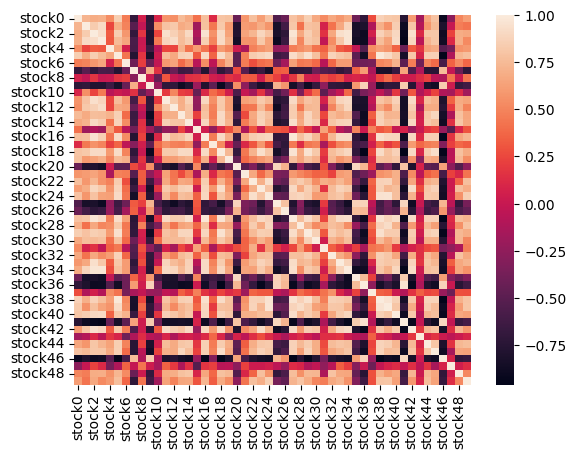

In [3]:
import seaborn as sns
corr_all = df.corr()
corr_train = train_df.corr()
sns.heatmap(corr_all)

<Axes: >

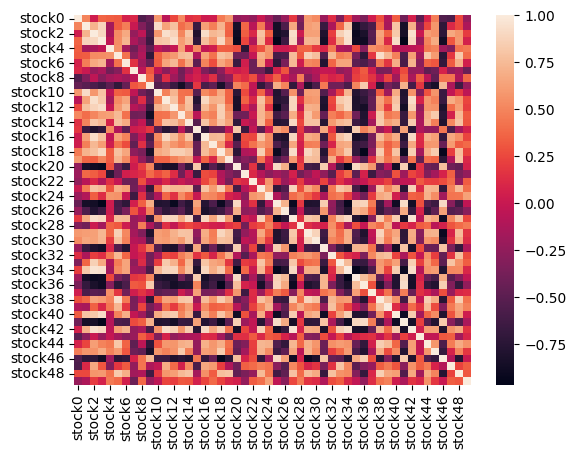

In [4]:
sns.heatmap(corr_train)

### Modelling absolute prices

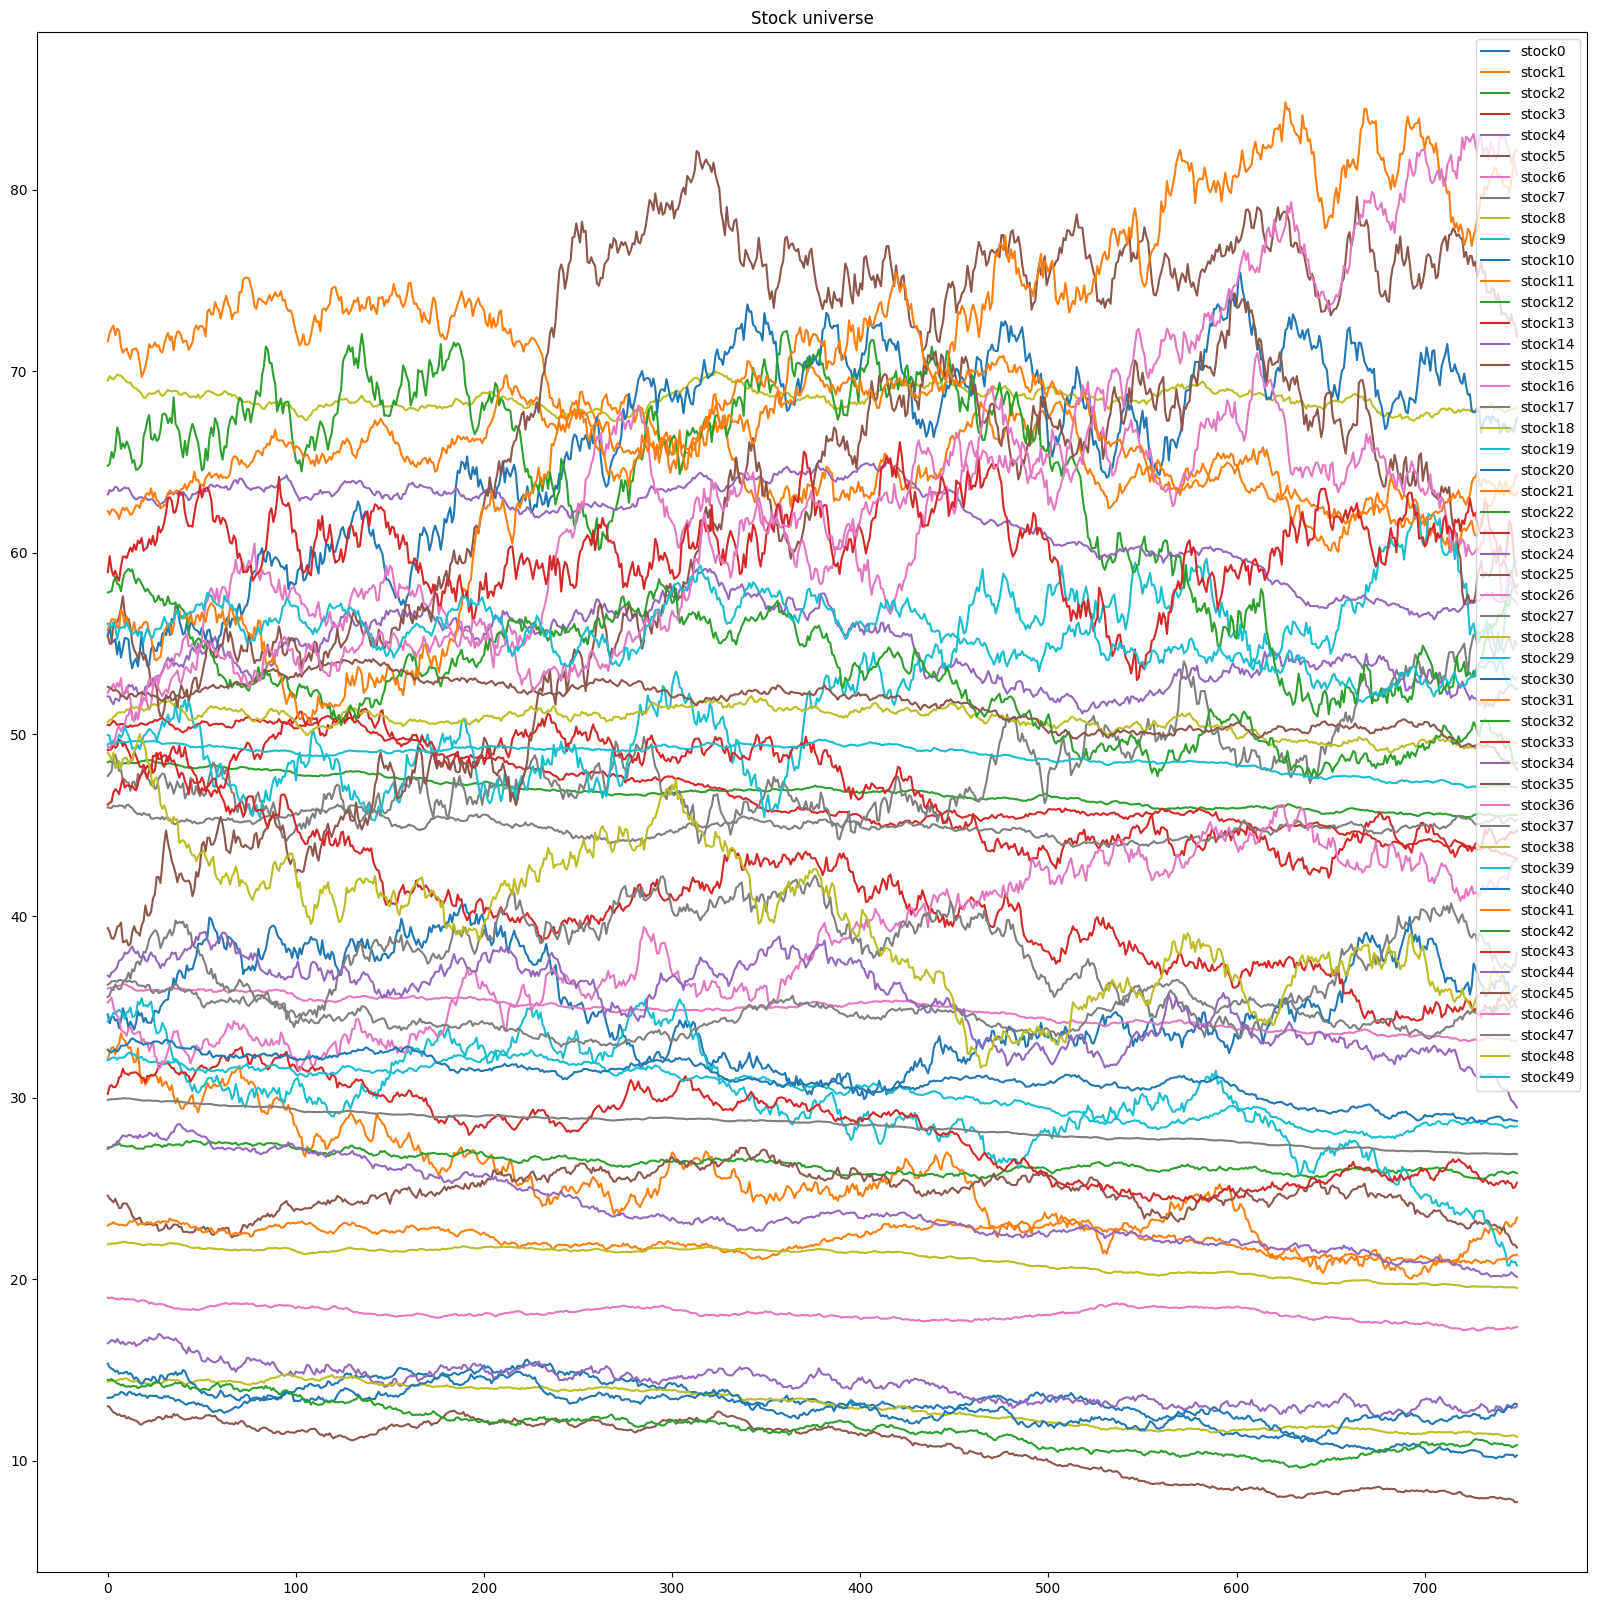

In [5]:
# Plot all stocks
def plot_all_stocks(df_T, figsize=(20,20), title=""):
    plt.figure(num='Universe', figsize=figsize)
    for index, row in df_T.iterrows():
        plt.plot(row, label=index)
    plt.title(label=title)
    plt.legend()
    plt.show()

plot_all_stocks(df.T, title="Stock universe")

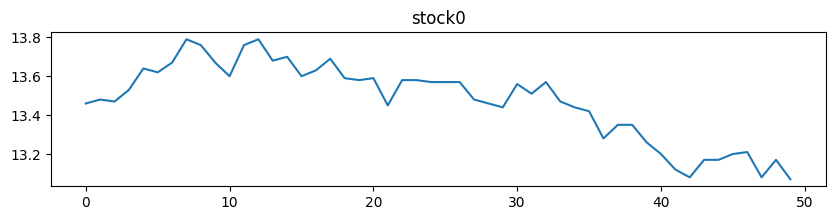

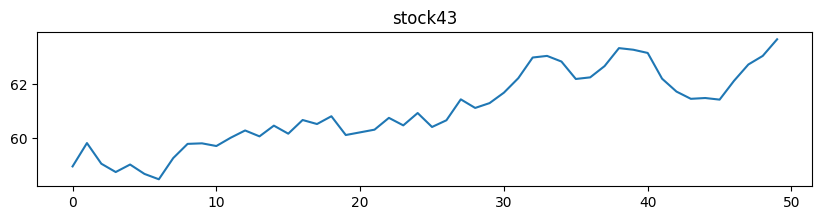

In [8]:
# Plot specific stock
def plot_one_stock(df_T, stock, window=750):
    fig = plt.figure(num=stock, figsize=(10,2))
    plt.plot(df_T.loc[stock].iloc[:window], label=stock)
    plt.title(label=stock)
    plt.show()

plot_one_stock(df.T, 'stock0', window=50)
plot_one_stock(df.T, 'stock43', window=50)

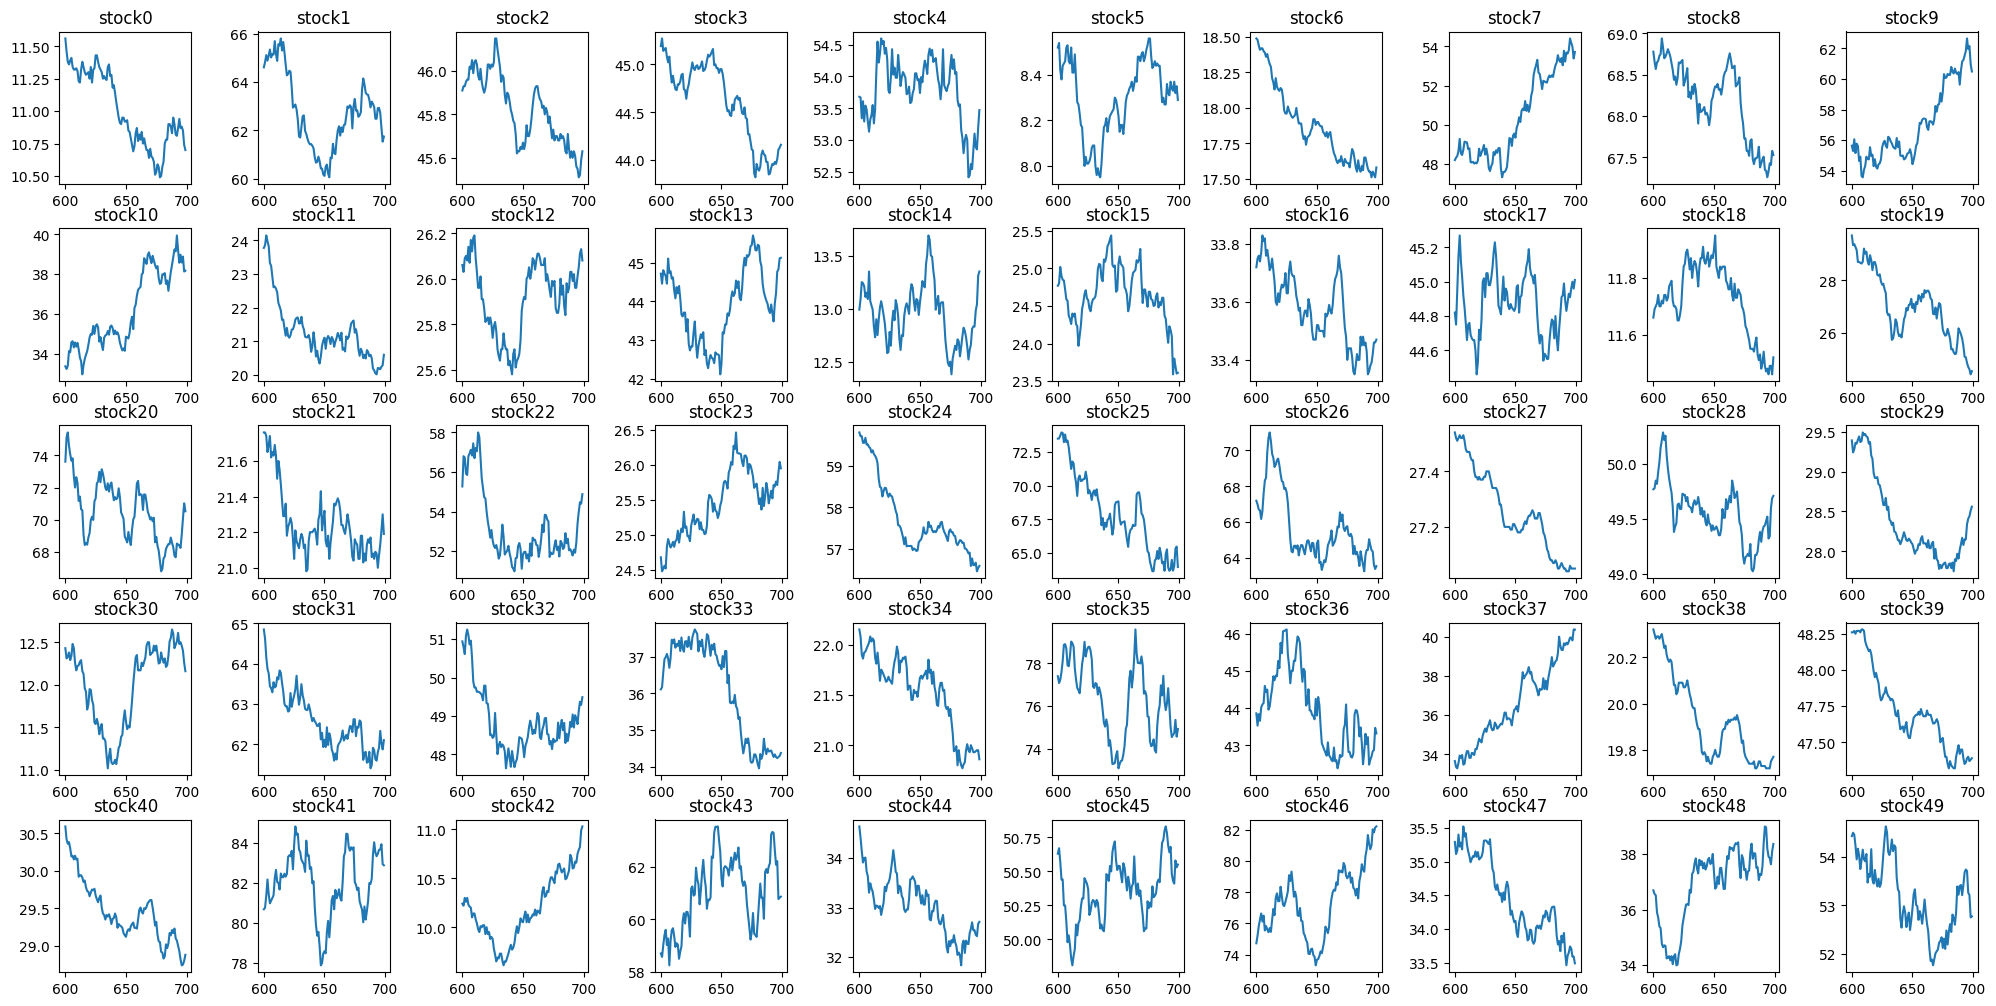

In [10]:
# Plot all stocks individually
def subplot_all_stocks(df_T, rows, cols, figsize=(20,10)):
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    fig.tight_layout()

    for i in range(rows):
        for j in range(cols):
            index = (i * cols) + j
            axs[i, j].plot(df_T.iloc[index].iloc[-150:-50])
            axs[i, j].set_title(df_T.iloc[index].name)
    plt.show()

subplot_all_stocks(df.T, 5, 10)

### Modelling % returns

In [6]:
df2 = df.copy()

# Replace with % returns
df2 = df2.pct_change().add_suffix('_pct_chg')
df2

stock0_pct_chg  stock1_pct_chg  stock2_pct_chg  stock3_pct_chg  \
0               NaN             NaN             NaN             NaN   
1          0.001486        0.006281        0.001238       -0.000396   
2         -0.000742        0.003467       -0.000824        0.002376   
3          0.004454        0.002211       -0.001238        0.002568   
4          0.008130       -0.007171       -0.000413       -0.001970   
..              ...             ...             ...             ...   
495       -0.005087        0.008037        0.001288        0.000219   
496       -0.008035        0.000295        0.000214       -0.000219   
497        0.008100        0.001181        0.000214       -0.001094   
498       -0.010226       -0.003243        0.001500       -0.000876   
499       -0.011070       -0.004141       -0.000214        0.002411   

     stock4_pct_chg  stock5_pct_chg  stock6_pct_chg  stock7_pct_chg  \
0               NaN             NaN             NaN             NaN   
1         -0.000768       -0.003846       -0.001581        0.002725   
2         -0.004994       -0.012355        0.001583        0.002926   
3         -0.002703       -0.010164       -0.001054        0.015840   
4          0.006001       -0.003160       -0.003692        0.002872   
..              ...             ...             ...             ...   
495        0.004407        0.000000        0.002221        0.001655   
496        0.002862        0.000000       -0.003324       -0.015903   
497       -0.003614       -0.004965        0.001668       -0.016369   
498       -0.001718        0.000000        0.000555       -0.014082   
499        0.000191        0.006986       -0.000555        0.005843   

     stock8_pct_chg  stock9_pct_chg  ...  stock40_pct_chg  stock41_pct_chg  \
0               NaN             NaN  ...              NaN              NaN   
1          0.003454       -0.000600  ...        -0.003676         0.003766   
2         -0.001864       -0.012017  ...        -0.001230         0.006611   
3         -0.000862        0.006892  ...         0.003387        -0.000355   
4          0.002013       -0.004228  ...         0.001534         0.000000   
..              ...             ...  ...              ...              ...   
495        0.001451       -0.003723  ...         0.000326         0.009856   
496        0.000580       -0.003381  ...        -0.000976         0.008441   
497       -0.001304        0.001607  ...         0.000000        -0.017002   
498        0.001160        0.007488  ...        -0.000326         0.012374   
499        0.000435        0.018404  ...         0.002607        -0.003680   

     stock42_pct_chg  stock43_pct_chg  stock44_pct_chg  stock45_pct_chg  \
0                NaN              NaN              NaN              NaN   
1          -0.001383         0.014761        -0.001907        -0.000760   
2           0.004155        -0.012874         0.006823        -0.001712   
3          -0.006897        -0.005251         0.001355        -0.001715   
4          -0.002778         0.004768         0.002436         0.000763   
..               ...              ...              ...              ...   
495        -0.008396         0.005738        -0.004545        -0.005311   
496         0.001881        -0.002445        -0.007610        -0.000593   
497         0.009390        -0.006209         0.005828        -0.002374   
498        -0.006512        -0.001480        -0.010369        -0.002182   
499        -0.000936         0.000823        -0.003390        -0.001988   

     stock46_pct_chg  stock47_pct_chg  stock48_pct_chg  stock49_pct_chg  
0                NaN              NaN              NaN              NaN  
1          -0.002635         0.001380        -0.003265        -0.000178  
2           0.005691         0.003309        -0.005733        -0.003210  
3          -0.001213         0.000550         0.009061         0.004293  
4           0.007487         0.000275        -0.017551        -0.004275  
..               

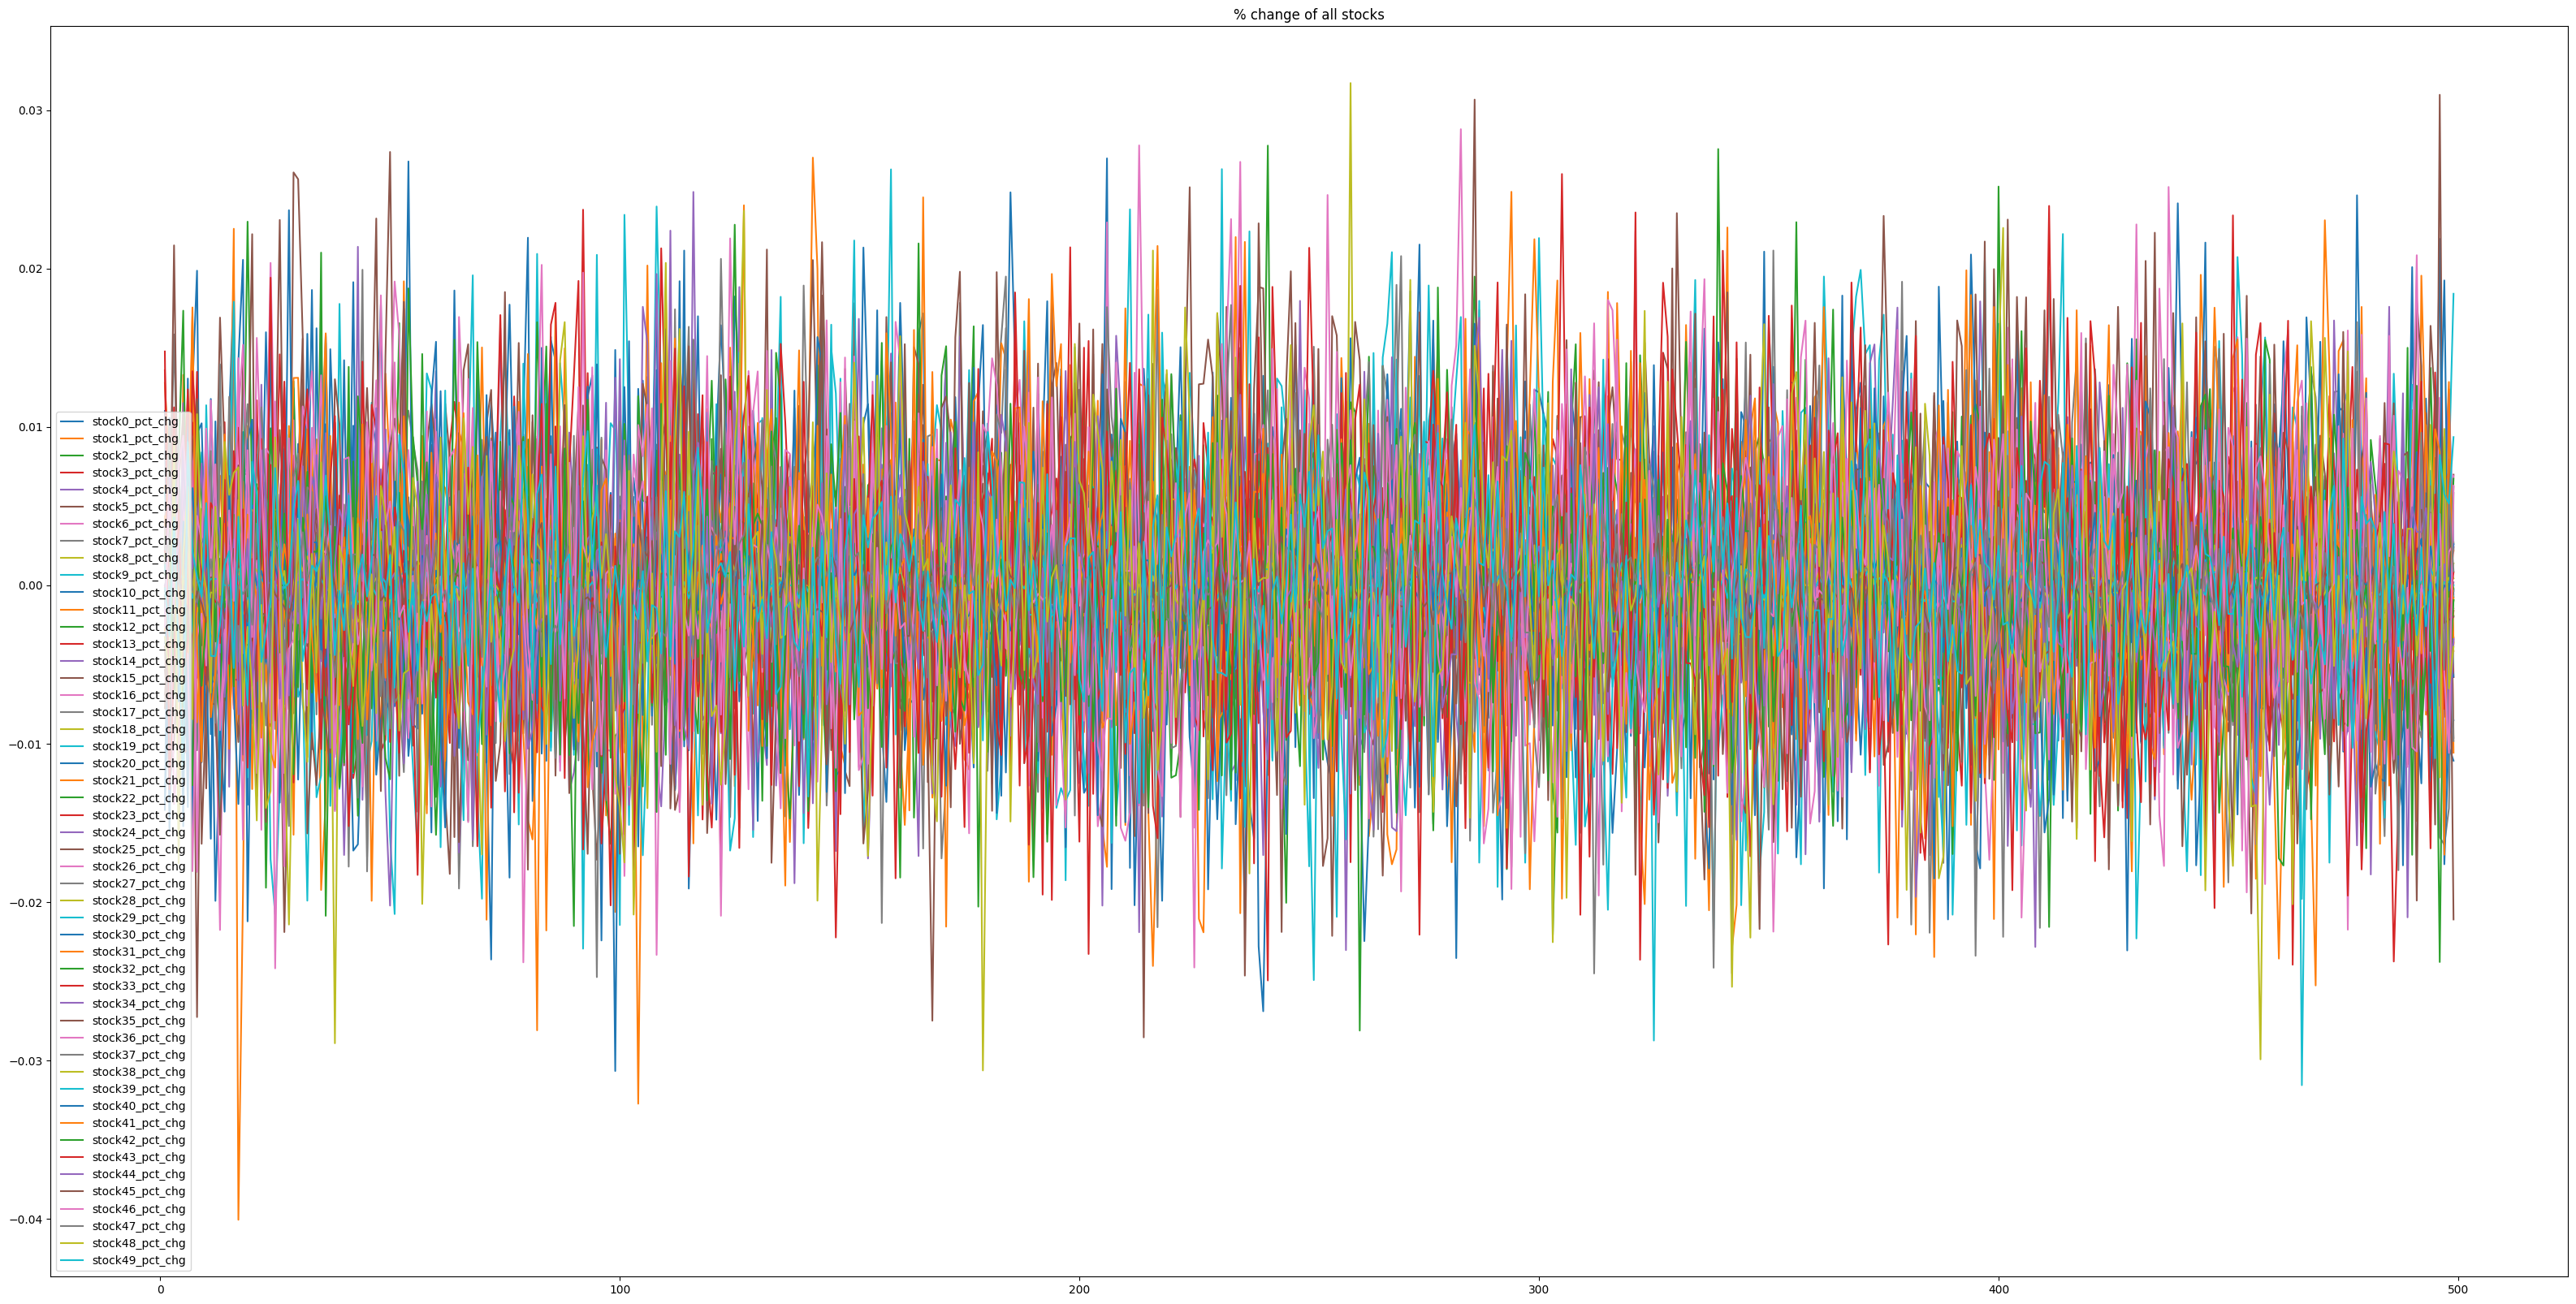

In [7]:
plot_all_stocks(df2.T, figsize=(40,20), title="% change of all stocks")

### Modelling Stationarity